In [1]:
pip install pycountry_convert


Note: you may need to restart the kernel to use updated packages.Collecting repoze.lru>=0.7

  Attempting uninstall: pytest
    Found existing installation: pytest 0.0.0
    Uninstalling pytest-0.0.0:
      Successfully uninstalled pytest-0.0.0


In [2]:
import warnings
import numpy as np
import pandas as pd 
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from pycountry_convert import country_alpha2_to_continent_code, country_name_to_country_alpha2

sns.set_theme(context='notebook', style='darkgrid', palette='deep', font='sans-serif', font_scale=1, color_codes=True, rc=None)
warnings.filterwarnings("ignore", category=DeprecationWarning) 
pd.options.mode.chained_assignment = None 

In [3]:
life_expectancy_data = pd.read_csv("D:/Life Expectancy Data.csv")
life_expectancy_data.head()

Country  Year      Status  Life expectancy   Adult Mortality  \
0  Afghanistan  2015  Developing              65.0            263.0   
1  Afghanistan  2014  Developing              59.9            271.0   
2  Afghanistan  2013  Developing              59.9            268.0   
3  Afghanistan  2012  Developing              59.5            272.0   
4  Afghanistan  2011  Developing              59.2            275.0   

   infant deaths  Alcohol  percentage expenditure  Hepatitis B  Measles   ...  \
0             62     0.01               71.279624         65.0      1154  ...   
1             64     0.01               73.523582         62.0       492  ...   
2             66     0.01               73.219243         64.0       430  ...   
3             69     0.01               78.184215         67.0      2787  ...   
4             71     0.01                7.097109         68.0      3013  ...   

   Polio  Total expenditure  Diphtheria    HIV/AIDS         GDP  Population  \
0    6.0               8.16         65.0        0.1  584.259210  33736494.0   
1   58.0               8.18         62.0        0.1  612.696514    327582.0   
2   62.0               8.13         64.0        0.1  631.744976  31731688.0   
3   67.0               8.52         67.0        0.1  669.959000   3696958.0   
4   68.0               7.87         68.0        0.1   63.537231   2978599.0   

    thinness  1-19 years   thinness 5-9 years  \
0                   17.2                 17.3   
1                   17.5                 17.5   
2                   17.7                 17.7   
3                   17.9                 18.0   
4                   18.2                 18.2   

   Income composition of resources  Schooling  
0                            0.479       10.1  
1                            0.476       10.0  
2                            0.470        9.9  
3                            0.463        9.8  
4                            0.454        9.5  

[5 rows x 22 columns]

In [6]:
## Let's see countries with highest & lowest life expectancy



In [4]:
# Countries with Highest Life Expectancy
country_vs_life = life_expectancy_data.groupby('Country', as_index=False)['Life expectancy '].mean()
country_vs_life.sort_values(by = 'Life expectancy ', ascending=False).head(10)

Country  Life expectancy 
84         Japan          82.53750
165       Sweden          82.51875
75       Iceland          82.44375
166  Switzerland          82.33125
60        France          82.21875
82         Italy          82.18750
160        Spain          82.06875
7      Australia          81.81250
125       Norway          81.79375
30        Canada          81.68750

In [5]:
# Countries with Lowest Life Expectancy
country_vs_life.sort_values(by = 'Life expectancy ', ascending = True).head(10)

Country  Life expectancy 
152              Sierra Leone          46.11250
31   Central African Republic          48.51250
94                    Lesotho          48.78125
3                      Angola          49.01875
100                    Malawi          49.89375
32                       Chad          50.38750
44              Côte d'Ivoire          50.38750
192                  Zimbabwe          50.48750
164                 Swaziland          51.32500
123                   Nigeria          51.35625

In [7]:
## Let's make a bubble plot to visualize Life Expectancy vs GDP Plot. Where size of the bubble determines the population of that particular country and color denotes the continent of the country.



In [8]:
continents = {
    'NA': 'North America',
    'SA': 'South America', 
    'AS': 'Asia',
    'OC': 'Australia',
    'AF': 'Africa',
    'EU': 'Europe'
}
continent = []
for country in life_expectancy_data['Country']:
    try:
        continent.append(continents[(country_alpha2_to_continent_code(country_name_to_country_alpha2(country)))])
    except:
        continent.append("Africa")
    
life_expectancy_data["Continent"] = continent
to_bubble = life_expectancy_data[["Country", "Year", "Life expectancy ", "GDP", "Population", "Continent"]]
to_bubble.dropna(inplace = True)

We extracted following results from the bubble plot:
Most of the African Countries has lowest life expectancy.
Countries having high GDP also has high life expectancy.
Most of the european countries has high GDP as well as high life expectancy.
Most of the asian countries have high population and life expectancy between 60 to 70.
Overall life expectancy and GDP has a linear relationship.
Interesting...

In [12]:
df = px.data.gapminder()

fig = px.scatter(to_bubble, x="GDP", y="Life expectancy ",
                 size="Population", color="Continent",
                 hover_name="Country", log_x=True, size_max=50)
fig.show()

Evidence of negative correlation between Life expectancy and Diseases can be seen in the following heatmap. Whereas, Income and Schooling has a strong positive correlation with Life expectancy. Life expectancy has a positive correlation with vaccines of Hepatitis B, Polio, and Diphtheria which explains a higher life span for those who are vaccinated. Both infant and adult mortality have a negative correlation with Life expectancy which is also very intutive.

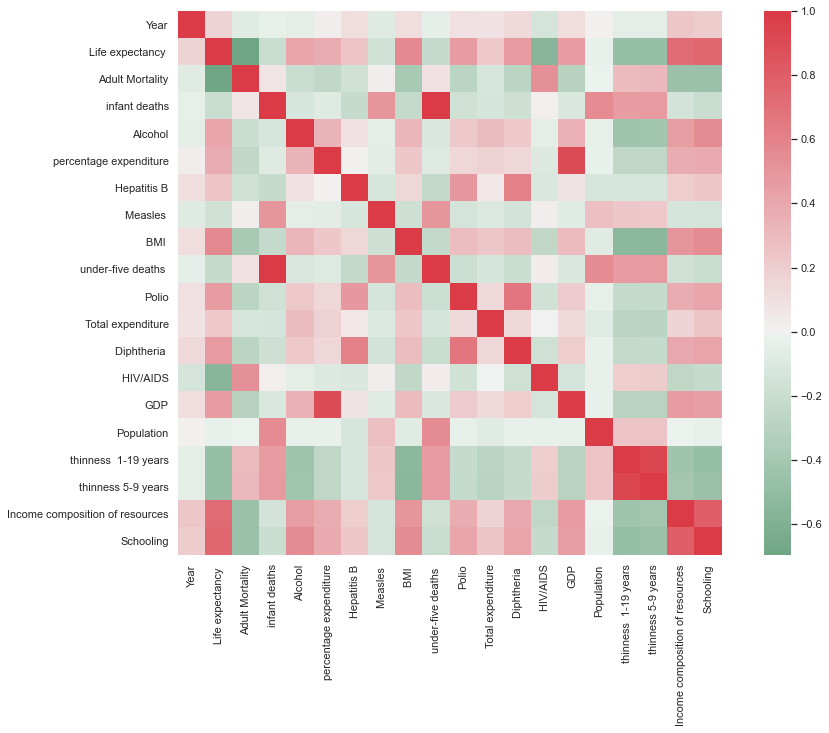

In [13]:
plt.figure(figsize=(15,10))
cmap = sns.diverging_palette(500, 10, as_cmap=True)
sns.heatmap(life_expectancy_data.corr(), cmap =cmap, center=0, annot=False, square=True);

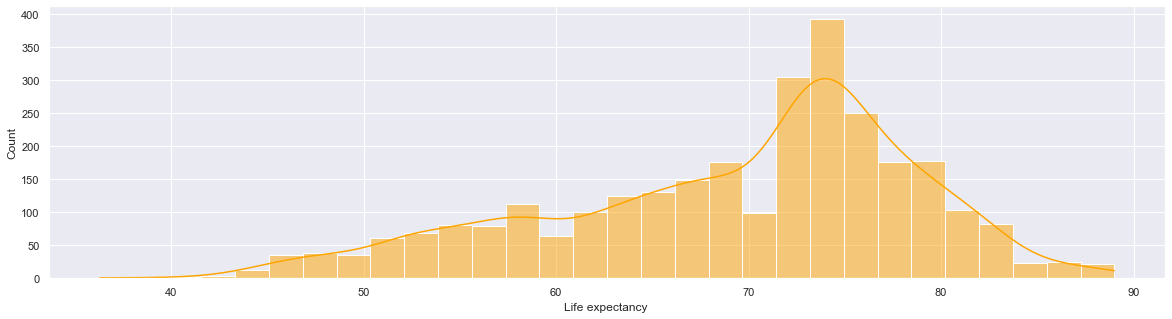

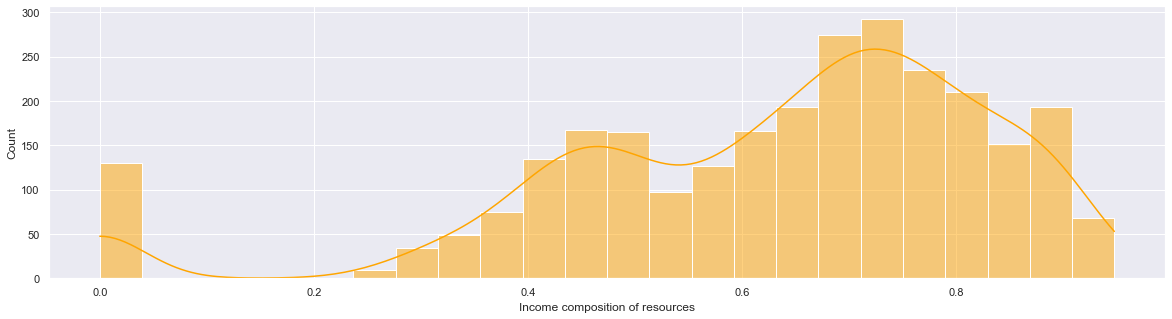

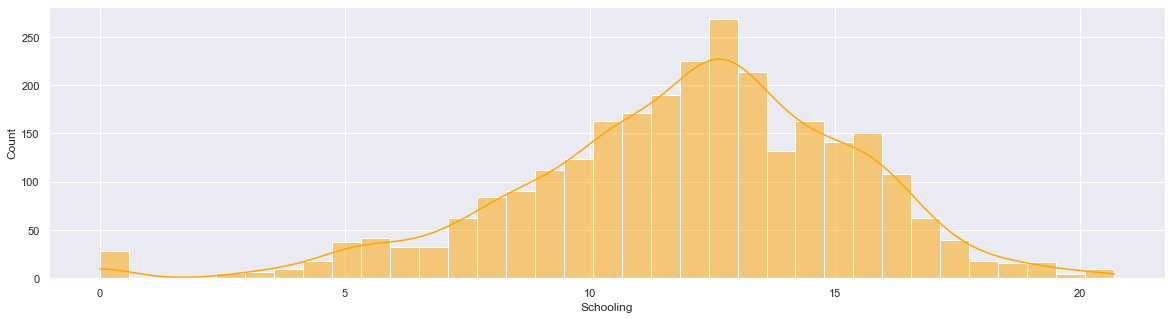

In [14]:
l= [life_expectancy_data['Life expectancy '].dropna(), life_expectancy_data['Income composition of resources'].dropna(), life_expectancy_data['Schooling'].dropna()]
for i in l:
    plt.figure(figsize=(20,5))
    sns.histplot(i, kde=True, color="orange")

Life expectncy has a dense distribution between 70 - 76 years.



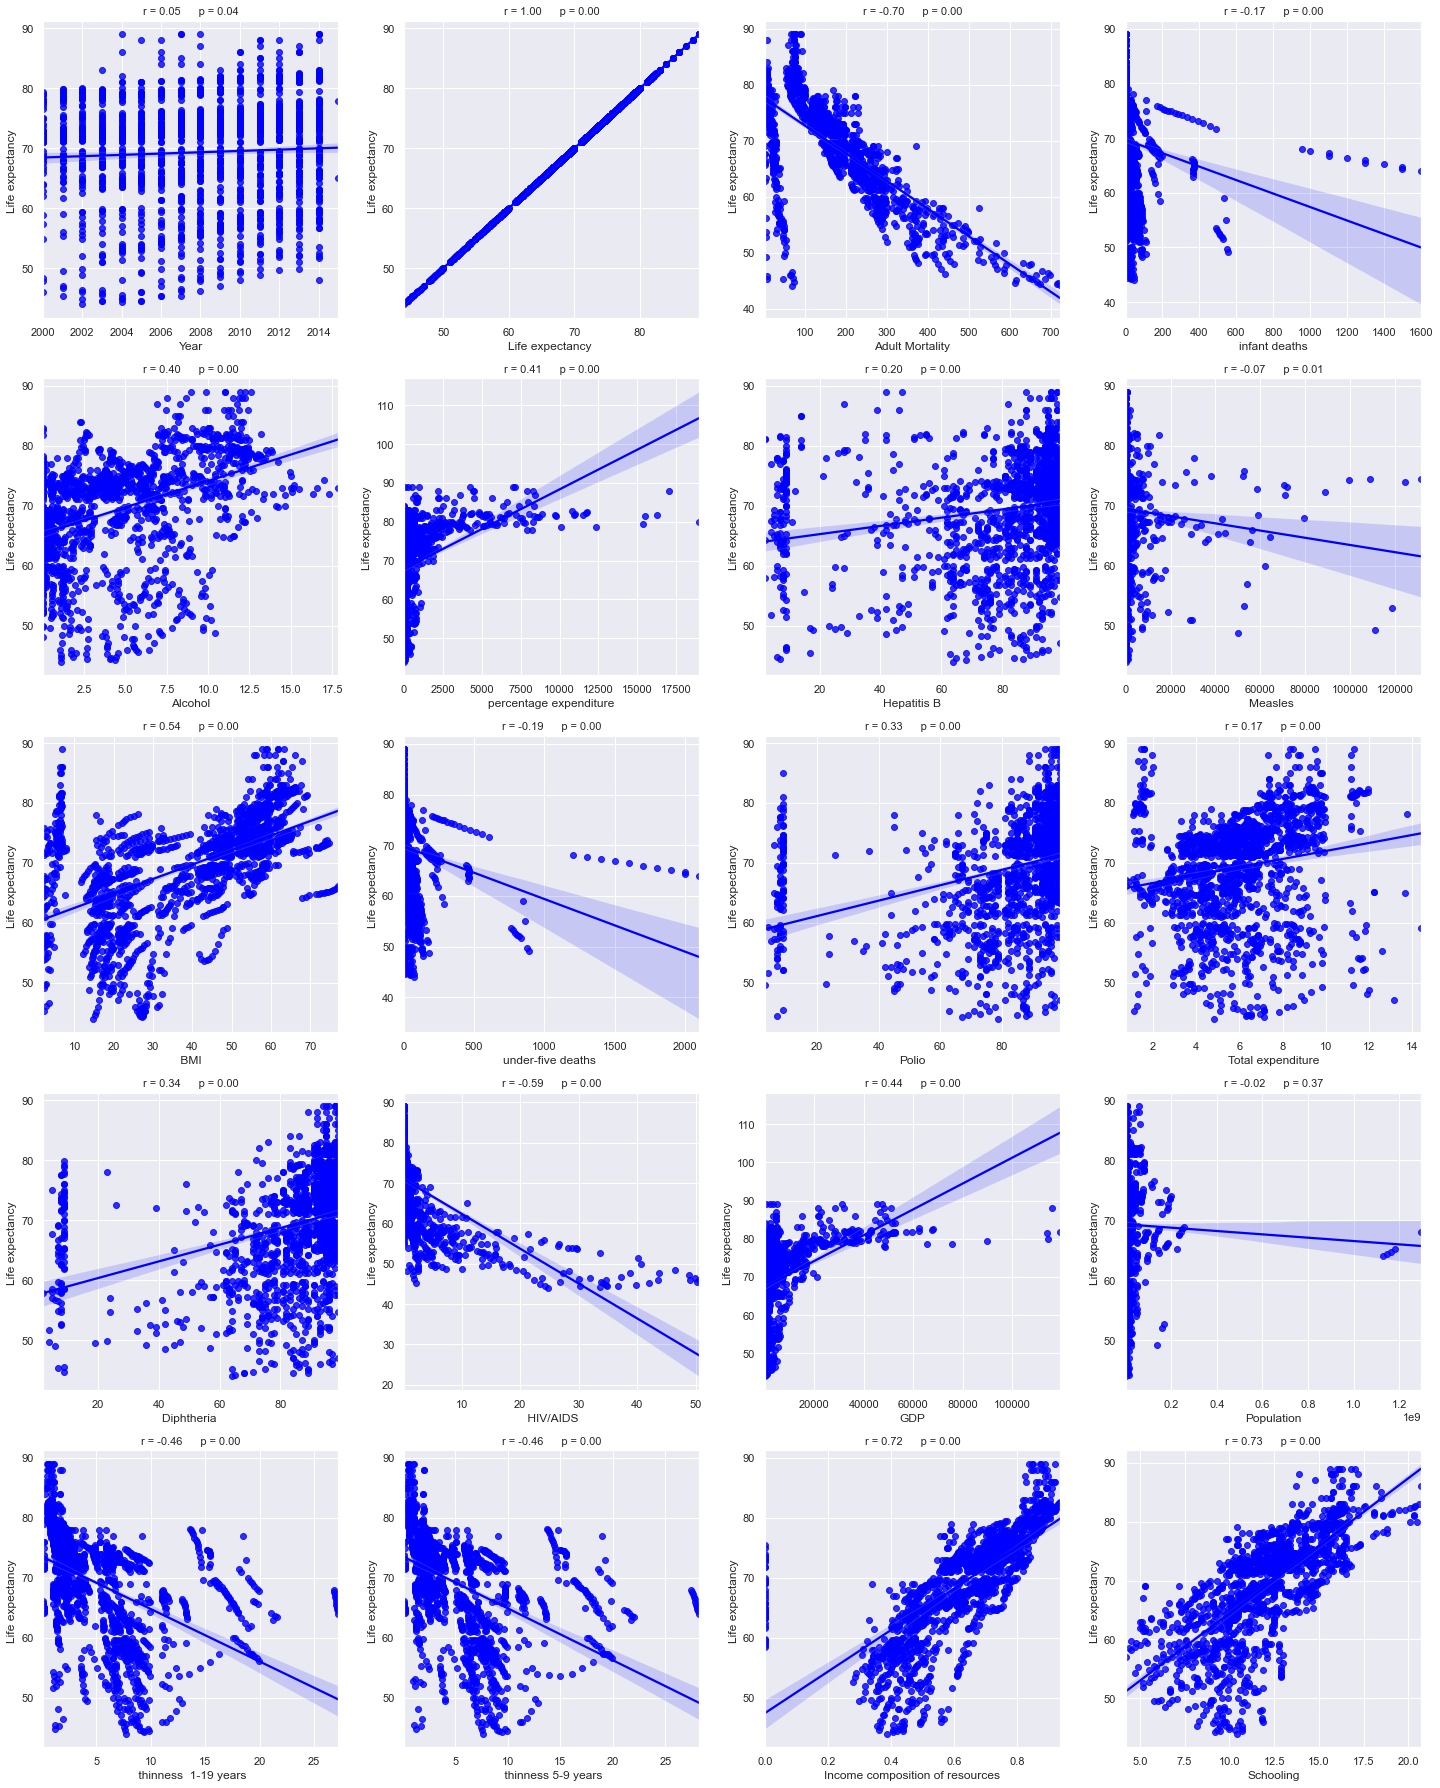

In [15]:
nr_rows = 5
nr_cols = 4

fig, axs = plt.subplots(nr_rows, nr_cols, figsize=(nr_cols*5,nr_rows*5))
numerical_feats = life_expectancy_data.dtypes[life_expectancy_data.dtypes != "object"].index
li_num_feats = list(numerical_feats)
li_not_plot = []
li_plot_num_feats = [c for c in list(numerical_feats) if c not in li_not_plot]
life_expectancy_data.dropna(inplace = True)

for r in range(0,nr_rows):
    for c in range(0,nr_cols):  
        i = r*nr_cols+c
        if i < len(li_plot_num_feats):
            sns.regplot(x = life_expectancy_data[li_plot_num_feats[i]],y = life_expectancy_data["Life expectancy "] , color = 'blue', ax = axs[r][c])
            stp = stats.pearsonr(life_expectancy_data[li_plot_num_feats[i]], life_expectancy_data["Life expectancy "])
            str_title = "r = " + "{0:.2f}".format(stp[0]) + "      " "p = " + "{0:.2f}".format(stp[1])
            axs[r][c].set_title(str_title,fontsize=11)
            
            
plt.tight_layout()    
sns.set(color_codes=True)
plt.show();

Above plot explains following trends:

Over the year, life expectancy has been increased slightly.

Life expectancy decreases with increase in infant's death.

Countries with high alchol consumption has high life expectancy. (I wonder how?)

BMI and life expectancy has a linear relationship.

Countries having chronic diseases has lower life expectancies.(Except Few)

GDP and Life expectancy has a strong linear relationship.

Countries with high population has slightly low life expectancy.

As total income composition of a country increases, life expectancy also increases. (If you're rich, you're expected to live a long life)

Last but not the least, schooling impacts the life expectancy as expected.

## Let's check the impact of Alcohol consumption over Life Expectancy for different continents.


Alcohol comsuption and Life expectancy has a positive relation for all the continents except Africa, which is kind of misleading with the intution.

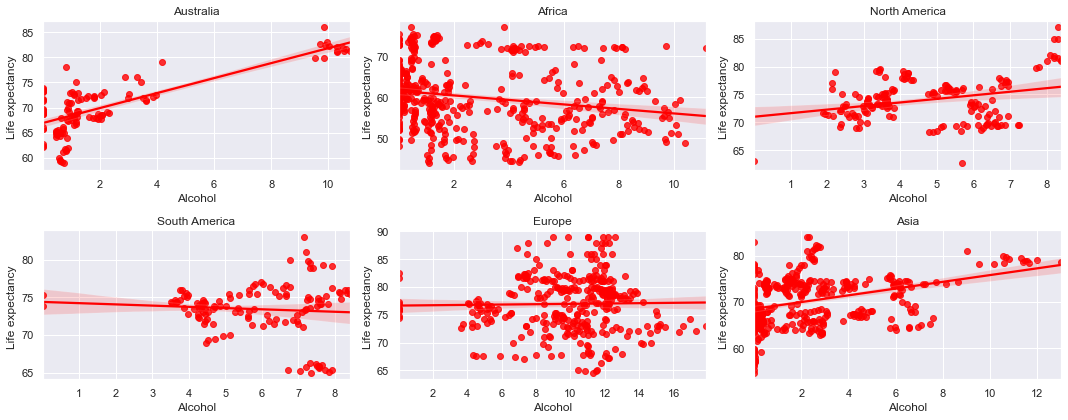

In [16]:
fig, axs = plt.subplots(2,3, figsize=(15, 6), facecolor='w', edgecolor='k')
fig.subplots_adjust(hspace = 0.5)

for conts, ax in zip(set(life_expectancy_data["Continent"]), axs.flat):
    Conts = life_expectancy_data[life_expectancy_data['Continent'] == conts]
    sns.regplot(x = Conts['Alcohol'],y = Conts["Life expectancy "], color = 'red', ax = ax).set_title(conts)

plt.tight_layout()    
sns.set(color_codes=True)
plt.show()

## Life Expectancy Estimation Regression Model.




Objective is to build a model that can estimate the Life expectancy given all the dependent parameters used in EDA. For this task, we'll use Random Forest Regressor with Random and Grid search CV. Using Random Search CV, we'll select the expected neighbourhood of top parameters for the model. Further, we will use Grid Search CV for fine tuning the parameters. We will compare the results with the baseline model(not tuned).



We will evaluate the model with R squared error and Residual Distribution followed by a Conclusion.

In [17]:
target = life_expectancy_data["Life expectancy "]
features = life_expectancy_data[life_expectancy_data.columns.difference(['Life expectancy '])]

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(pd.get_dummies(features), target, test_size=0.3)

## Random Search Cross-Validation RF

In [19]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(random_state = 42)
from pprint import pprint
# Look at parameters used by our current forest
print('Parameters currently in use:\n')
pprint(rf.get_params())

Parameters currently in use:

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}


In [20]:
import numpy as np
from sklearn.model_selection import RandomizedSearchCV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 4, stop = 200, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
pprint(random_grid)

{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [4, 25, 47, 69, 91, 112, 134, 156, 178, 200]}


In [21]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()
# Random search of parameters, using 7 fold cross validation, 
# search across 200 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 5, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train, Y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   14.1s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:  3.1min
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:  4.0min finished


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [4, 25, 47, 69, 91, 112,
                                                         134, 156, 178, 200]},
                   random_state=42, verbose=2)

In [22]:
rf_random.best_params_

{'n_estimators': 134,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 100,
 'bootstrap': True}

In [23]:
def evaluate(model, test_features, test_labels):
    predictions = model.predict(test_features)
    errors = abs(predictions - test_labels)
    mape = 100 * np.mean(errors / test_labels)
    accuracy = 100 - mape
    print('Model Performance')
    print('Average Error: {:0.4f} degrees.'.format(np.mean(errors)))
    print('Accuracy = {:0.2f}%.'.format(accuracy))
    
    return accuracy

base_model = RandomForestRegressor()   # n_estimators = 10
base_model.fit( X_test, Y_test)
base_accuracy = evaluate(base_model, X_test, Y_test)

best_random = rf_random.best_estimator_
random_accuracy = evaluate(best_random,  X_test, Y_test)

print('Improvement of {:0.2f}%.'.format( 100 * (random_accuracy - base_accuracy) / base_accuracy))

Model Performance
Average Error: 0.5440 degrees.
Accuracy = 99.20%.
Model Performance
Average Error: 1.0131 degrees.
Accuracy = 98.51%.
Improvement of -0.69%.


It seems like our base-line model is performing better than our random search CV tuned model. That simply means Hyper-tuning is not required but let's do it anyway.



## Grid Search with Cross-Validation RF

In [24]:
from sklearn.model_selection import GridSearchCV
# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True, False],
    'max_depth': [10, 20, 50, None],
    'max_features': [2, 3, 4, 'auto'],
    'min_samples_leaf': [1, 3, 5],
    'min_samples_split': [1, 2, 4, 8],
    'n_estimators': [10, 30, 100, 120, 150]
}
# Create a based model
rf = RandomForestRegressor()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, cv = 3, n_jobs = -1, verbose = 2)

In [25]:
grid_search.fit(X_train, Y_train)


Fitting 3 folds for each of 1920 candidates, totalling 5760 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    4.7s
[Parallel(n_jobs=-1)]: Done 220 tasks      | elapsed:   13.6s
[Parallel(n_jobs=-1)]: Done 605 tasks      | elapsed:   40.3s
[Parallel(n_jobs=-1)]: Done 888 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 1253 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 1698 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done 2225 tasks      | elapsed:  3.2min
[Parallel(n_jobs=-1)]: Done 2832 tasks      | elapsed:  4.0min
[Parallel(n_jobs=-1)]: Done 3741 tasks      | elapsed:  5.3min
[Parallel(n_jobs=-1)]: Done 4942 tasks      | elapsed:  7.5min
[Parallel(n_jobs=-1)]: Done 5760 out of 5760 | elapsed:  9.4min finished


GridSearchCV(cv=3, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'max_depth': [10, 20, 50, None],
                         'max_features': [2, 3, 4, 'auto'],
                         'min_samples_leaf': [1, 3, 5],
                         'min_samples_split': [1, 2, 4, 8],
                         'n_estimators': [10, 30, 100, 120, 150]},
             verbose=2)

In [26]:
print(grid_search.best_params_)
best_grid = grid_search.best_estimator_
grid_accuracy = evaluate(best_grid, X_test, Y_test)
print('Improvement of {:0.2f}%.'.format( 100 * (grid_accuracy - base_accuracy) / base_accuracy))

{'bootstrap': True, 'max_depth': 20, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 120}
Model Performance
Average Error: 1.0487 degrees.
Accuracy = 98.46%.
Improvement of -0.75%.


In [27]:
model_predictions = best_grid.predict(X_test)
residuals = model_predictions - Y_test

Residuals is the difference between the predictions from model and actual of Test data.

Ideally the distribution of these residuals should be normal with mean centered at zero. In our case, it is almost normal and mean is almost centered at 0. Which indicates our model is highly efficient.

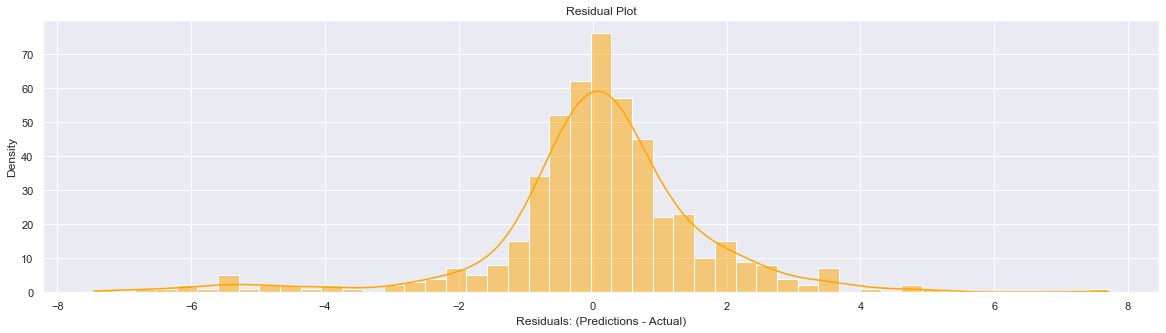

In [28]:
plt.figure(figsize=(20,5))
sns.histplot(residuals, kde=True, color="orange")
plt.title('Residual Plot')
plt.xlabel('Residuals: (Predictions - Actual)')
plt.ylabel('Density');

Let's check the R squared Score for our model



In [29]:
from sklearn.metrics import r2_score
print("R-squared Score Obtained for predicting Life Expectancy is {0}".format(r2_score(Y_test, model_predictions)))

R-squared Score Obtained for predicting Life Expectancy is 0.9645690598921127


## Conclusion


One can extend his/her life span by adopting a healthy life-style, proper education, and by getting vaccinated. Ofcourse Demographic location plays an important role. In our analysis, we saw people living in Europe has a higher life-span as compared to other continents. Country's GDP and Income composition affects the Life Expectancy in a broader way.



There are some parameters like pollution and environmental index that has been missing in this analysis and expected to be highly related with Life Expectancy.



Getting Vaccinated for various diseases also increases the expected life span. Consumption of Alcohol and Life expectancy has an unexpected positive relation except for Africa.